### **OBTAIN THE DATA FROM KAGGLE** 

In [ ]:
# kaggle dataset https://www.kaggle.com/c/tweet-sentiment-extraction/data?select=train.csv
from google.colab import files
files.upload() 

# **TWEET SENTIMENT ANALYSIS/EXTRACTION**
### **DATA SOURCE** : 
https://www.kaggle.com/c/tweet-sentiment-extraction/data?select=train.csv

### **DATA DESCRIPTION** : 
Each row contains the text of a tweet and a sentiment label. In the training set we are provided with a word or phrase drawn from the tweet (selected_text) that encapsulates the provided sentiment.

#### **COLUMNS**

*   textID - unique ID for each piece of tweet
*   text - the text of the tweet
*   sentiment - the general sentiment of the tweet
*   selected_text - [train only] the text that supports the tweet's sentiment

#### **TARGET CLASSES**

1.   Negative
2.   Neutral
3.   Positive

#### **IMPORTANT NOTE** : 

Kindly note that the kaggle competition demands to extract the string that best supports the sentiment for the tweet given in the question But, I am using this dataset to explore sentiment analysis & perform text classification.

#### **OBJECTIVE** :-
             

1.   Build a classifier to best Classify a given tweet to any of the target classes.
2.   The optimal model found should be able to perform well & classify the future tweets with high precision and recall.
3.   Our goal is to maximize the F1 score of each class so as to build a robust model.
4.   The best optimal model to be locally deployed in order to analyze future incoming tweets.

#### **PLAN OF ACTION** :-

*   To Read & process the dataset.
*   To Check for duplicates & remove if any.
*   To Check for missing values & process them accordingly.
*   To Analyze the distribution of the Target Feature & check for imbalance among the classes.
*   Text cleaning & preprocessing to be done to ensure a noise free model.
*   Before vectorizing the data, we have to split the data into train & test datasets in order to avoid data leakage.
*   To Perform multivariate analysis on the tweets.
*   To Try out various models like Logistic regression,Naive bayes,decision tree,ensemble models etc..
*   To Test the performance of the best/optimal model & capture its F1 score values. 
*   Create a wordcloud for the False positive & False negative points to better understand & interpret the model.
*   To display the final results of all the models & pick the optimal one.
*   Finally, deploy the best model.








    


#### **READ THE DATASET & DISPLAY THE OUTPUT** 

In [25]:
# Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# Read the dataset
data = pd.read_csv('train.csv')
print("The shape of the data:",data.shape)
data.head(3)  

The shape of the data: (27481, 4)


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative


#### **CHECK FOR DUPLICATES & REMOVE IF ANY**

In [26]:
# since the "textID" has to be unique ,lets check for duplicates
data[data.duplicated(subset = ['textID'],keep = 'first')] 

,textID,text,selected_text,sentiment


In [27]:
data[data.duplicated()]  # check for row duplicates

,textID,text,selected_text,sentiment


#### **MISSING VALUE TREATMENT**

In [28]:
data.isnull().sum()  # check for missing values 

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [29]:
# remove missing values rows
new_data = data.dropna(axis = 0, how ='any')

print("Shape of the new_data after removing missing values",new_data.shape)
print(new_data.isnull().sum())

Shape of the new_data after removing missing values (27480, 4)
textID           0
text             0
selected_text    0
sentiment        0
dtype: int64


#### **EXTRACT THE RELEVANT FEATURES FOR ANALYSIS**

In [30]:
# lets grab the required columns from the new_data
new_data = new_data[['textID','text','sentiment']]
print("Shape of the new dataframe",new_data.shape)

Shape of the new dataframe (27480, 3)


#### **DISTRIBUTION OF TARGET FEATURE**

Distribution of classes
neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64


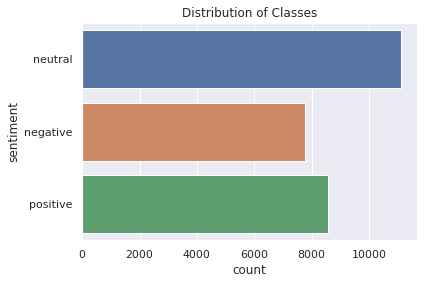

In [31]:
# lets first analyze the 'sentiment column' 
x = new_data['sentiment'].value_counts()
print("Distribution of classes")
print(x)

# countplot of target feature
sns.set_theme(style="darkgrid")
sns.countplot(y="sentiment",data= new_data,orient = 'h')
plt.title("Distribution of Classes")
plt.show()

#### **MULTIVARIATE ANALYSIS OF TRAINING DATA USING TSNE(JUSTIFICATION PURPOSE)**

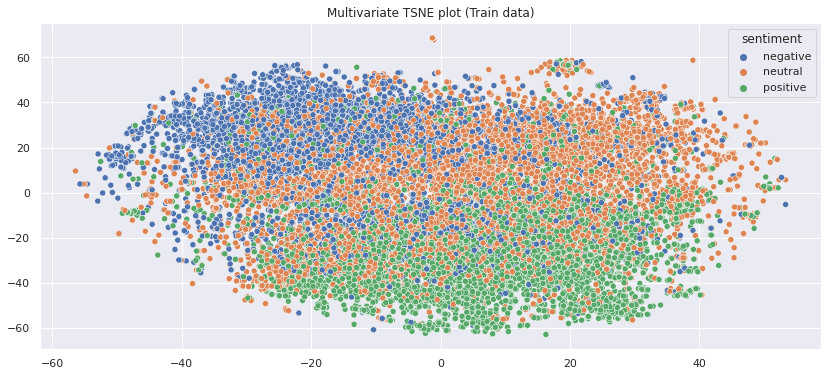


Time taken for execution :  531.2366421222687 seconds


In [ ]:
# Required library
'''import time 
st = time.time()
from sklearn.manifold import TSNE  # EXECTUTION TIME : 10 MIN
import seaborn as sns

plt.figure(figsize = (14,6))   # define figure size

xtsne = TSNE(n_components=2,perplexity=30)   # With perplexity 30

# Display the results in a 2D plot
results = xtsne.fit_transform(train_X_normalized)   
vis_x = results[:, 0]
vis_y = results[:, 1]  
sns.scatterplot(x = vis_x,y = vis_y,hue=y_train)  
plt.title("Multivariate TSNE plot (Train data)")  
plt.show() 

et = time.time()
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program.''' 

#### **REMOVE THE NEUTRAL CLASS POINTS**

In [32]:
# just remove 'neutral rows'
new_data.drop(new_data[new_data['sentiment'] == 'neutral'].index, inplace = True) 

#### **DEFINE OUR CUSTOM STOPWORDS**

In [33]:
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i','im','me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'could','couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'had',\
            "hadn't", 'has', "hasn't", 'have', "haven't", 'isn', "isn't", 'ma', 'might', "mightn't", 'must',\
            "mustn't", 'need', "needn't", 'shan', "shan't",'should',"shouldn't", 'wasn', "wasn't", 'weren', "weren't",\
            "won't",'would', "wouldn't"]

#### **TEXT CLEANING & PREPROCESSING**

In [34]:
# Required libraries
from tqdm import tqdm
import re
import time 
st = time.time()

# general cleaning of text data
def preprocessing_txt(text_data):
    preprocessed_text = []         # store the cleaned text
    
    for input_txt in tqdm(text_data):
        
        # Remove punctuations & special characters in the tweets
        replaced = re.sub(r'(\<.*\>)','',input_txt)
        replaced = re.sub(r'(\(.*\))','',replaced)
        replaced = re.sub('(\s+)',' ',replaced)
        replaced = re.sub('\w+\:+','',replaced)
        replaced = re.sub('[\,\!\/\)\(\-\<\.\?\>\@\*\_\#\;\|\+\=\$\&\:\"]+','',replaced) 

        # Expand the words & remove digits in the tweets
        phrase = re.sub(r"won't", "will not",replaced,flags = re.I)
        phrase = re.sub(r"can\'t", "can not",phrase,flags = re.I)
        phrase = re.sub(r"n\'t", " not", phrase,flags = re.I)
        phrase = re.sub(r"\'re", " are", phrase,flags = re.I)
        phrase = re.sub(r"\'s", " is", phrase,flags = re.I)
        phrase = re.sub(r"\'d", " would", phrase,flags = re.I)
        phrase = re.sub(r"\'ll", " will", phrase,flags = re.I)
        phrase = re.sub(r"\'t", " not", phrase,flags = re.I)
        phrase = re.sub(r"\'ve", " have", phrase,flags = re.I)
        replaced = re.sub(r"\'m", " am", phrase,flags = re.I)
        replaced = re.sub('\d+','',replaced) 

        # Convert to lowercase & strip the trailing spaces 
        replaced = replaced.lower()
        replaced = re.sub('\W+',' ',replaced)
        replaced = ' '.join(e for e in replaced.split() if e not in stopwords)
        replaced = replaced.strip()

        # finally append the cleaned text to the list
        preprocessed_text.append(replaced)
    
    return preprocessed_text # return the list

# call the preprocess function    
preprocessed_text = preprocessing_txt(new_data['text'].values)

# display the output
print("\nBefore preprocessing [displaying few rows] :-\n")
print(new_data['text'].values[100:103])
print("\nAfter preprocessing [displaying few rows] :-\n")
print(preprocessed_text[100:103])

et = time.time() 
print("\nTime taken for the execution : ",et-st,'seconds') # time taken by the program.

100%|██████████| 16363/16363 [00:01<00:00, 12125.55it/s]


Before preprocessing [displaying few rows] :-

['first night in myers. just not the same w/out lydia!  but i`m actually excited about this summer!'
 ' good morning' ' its the best show EVER!']

After preprocessing [displaying few rows] :-

['first night myers not wout lydia actually excited summer', 'good morning', 'best show ever']

Time taken for the execution :  1.3592562675476074 seconds


##### **LEMMATIZATION ON THE TEXT DATA**

In [35]:
# Required libraries
from nltk.stem import WordNetLemmatizer
import nltk
import time 
st = time.time()

nltk.download('punkt') # dependancy
nltk.download('wordnet') # dependancy

final_preprocessed_txt = []  # store the output

for tweet in preprocessed_text:

    # Tokenize: Split the tweet into words
    word_list = nltk.word_tokenize(tweet)
    
    # >>>['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best']

    # lemmatize the list of words and join as a sentence
    lemmatizer = WordNetLemmatizer()
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])

    final_preprocessed_txt.append(lemmatized_output)

# display the following output
print("\nTotal rows processed --> ",len(final_preprocessed_txt))
print("\n")
print("\nLemmatized tweets --> \n")
print(final_preprocessed_txt[100:102]) 

et = time.time()
print("\nTime taken for the execution : ",et-st,'seconds') # time taken by the program.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!

Total rows processed -->  16363



Lemmatized tweets --> 

['first night myers not wout lydia actually excited summer', 'good morning']

Time taken for the execution :  2.820650339126587 seconds


##### **CREATE THE FINAL DATAFRAME**

In [36]:
# lets insert 'preprocessed_text' column into the dataframe
new_data['preprocessed_text'] = final_preprocessed_txt
new_data.head(4) 

,textID,text,sentiment,preprocessed_text
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,negative,bos bullying
3,9642c003ef,what interview! leave me alone,negative,interview leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,son put release already bought


In [37]:
# remove the 'text column' 
new_data.drop(['text'], axis=1,inplace = True)

In [38]:
# check shape of the new dataframe
print(new_data.shape) 
new_data.head(4)

(16363, 3)


,textID,sentiment,preprocessed_text
1,549e992a42,negative,sooo sad miss san diego
2,088c60f138,negative,bos bullying
3,9642c003ef,negative,interview leave alone
4,358bd9e861,negative,son put release already bought


#### **TRAIN-TEST SPLIT**

In [39]:
# Required libraries
import time 
st = time.time()

y = new_data['sentiment']              # Store the target feature
X = new_data[['preprocessed_text']]    # Store the input text feature

from sklearn.model_selection import train_test_split # necessary library 

# Splitting of the data into train & test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify = y,
                                                 random_state=6)

# Display the following as output
print("Training data Input shape --> ",X_train.shape)
print("Testing data Input shape --> ",X_test.shape)
print("Training data Output shape --> ",y_train.shape)
print("Testing data Output shape --> ",y_test.shape)    

et = time.time()
print("\nTime taken for the execution : ",et-st,'seconds') # time taken by the program.

Training data Input shape -->  (11454, 1)
Testing data Input shape -->  (4909, 1)
Training data Output shape -->  (11454,)
Testing data Output shape -->  (4909,)

Time taken for the execution :  0.0294644832611084 seconds


#### **VECTORIZATION OF TRAIN & TEST DATA**

In [ ]:
# Required libraries
from gensim.models import KeyedVectors # execution time 2m 38s
import time 
st = time.time()

# Load the google news word vectors as a model
filename = 'https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

# Store the vocabulary
glove_words = model.vocab 

# Display the following
print(len(model['enjoy']))
et = time.time() 
print("\nTime taken for the execution : ",et-st,'seconds') # time taken by the program.

300

Time taken for the execution :  140.40432476997375 seconds


##### **COMPUTE AVERAGE W2V FOR TRAIN DATA**

In [43]:
# Required Libraries
import time 
st = time.time() 
 
# average Word2Vec
# compute average word2vec for each tweet.

list_of_sent = X_train['preprocessed_text'].values 

avg_w2v_vectors_train = [];            # the avg-w2v for each tweet is stored in this list
for sentence in tqdm(list_of_sent):    # for each sentence
    vector = np.zeros(300)             # dim is 300
    cnt_words =0;                      # num of words with a valid vector in the sentence
    
    for word in sentence.split():      # for each word in a tweet/sentence
        if word in glove_words:
            vector += model[word] 
            cnt_words += 1  
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)  # append the vector

# Display the following 
print("\n") 
print("\nNo of rows vectorized --> ",len(avg_w2v_vectors_train)) 
print("\nDimension of each row vector --> ",len(avg_w2v_vectors_train[0]))
et = time.time()
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program.  

100%|██████████| 11454/11454 [00:00<00:00, 21196.39it/s]




No of rows vectorized -->  11454

Dimension of each row vector -->  300

Time taken for execution :  0.5465810298919678 seconds


##### **COMPUTE AVERAGE W2V FOR TEST DATA**

In [44]:
# Required Libraries
import time 
st = time.time() 

avg_w2v_vectors_test = []; # the avg-w2v for each sentence is stored in this list

list_of_sent = X_test['preprocessed_text'].values 

for sentence in tqdm(list_of_sent): # For each tweet/sentence

    vector = np.zeros(300)          # Dim is 300
    cnt_words =0;                   # num of words with a valid vector in the sentence
    for word in sentence.split():   # for each word in a tweet/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)  # Append the vector

# Display the following
print("\n") 
print("\nNo of rows vectorized --> ",len(avg_w2v_vectors_test)) 
print("\nDimension of each row vector --> ",len(avg_w2v_vectors_test[0]))
et = time.time()
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program. 

100%|██████████| 4909/4909 [00:00<00:00, 20740.60it/s]




No of rows vectorized -->  4909

Dimension of each row vector -->  300

Time taken for execution :  0.24859261512756348 seconds


#### **FEATURE ENGINEERING USING NLTK (POLARITY SCORES)**

In [45]:
# Required libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Obtain the polarity of the sentence
sid = SentimentIntensityAnalyzer()  

for_sentence = "Its a delight to work with TCW."
 
ss = sid.polarity_scores(for_sentence)   # Polarity scores computed

# Display the following
print("\nPolarity of the given sentence :\n",ss)
 
# we can use these 4 scores as features/attributes (neg, neu, pos, compound)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...

Polarity of the given sentence :
 {'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'compound': 0.5994}


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


##### **POLARITY SCORES FOR TRAIN & TEST DATA**

In [46]:
# Required library
import time 
st = time.time() 

# Define a function and call the function:
def sentiment_scores(lst): 
    neg,pos,compound = [],[],[]              # store the scores

    for sent in lst:                                # for each tweet

        # obtain the scores
        sentiment_dict = sia.polarity_scores(sent) 
        neg.append(sentiment_dict['neg']) 
        pos.append(sentiment_dict['pos']) 
        compound.append(sentiment_dict['compound']) 

    # create the feature names    
    negative = pd.Series(neg)  
    positive = pd.Series(pos) 
    compound = pd.Series(compound) 
    features = {'Negative':negative,"Positive":positive,"Compound":compound} 

    # make a dataframe
    result = pd.DataFrame(features) 
    return result 
 
sia = SentimentIntensityAnalyzer() 
# Pass X_train and X_test into the above function to obtain scores: 
 
lst_xtrain = X_train['preprocessed_text'].values
lst_xtest = X_test['preprocessed_text'].values   
 
df_Xtrain = sentiment_scores(lst_xtrain)
df_Xtest = sentiment_scores(lst_xtest)

# Display the following
print("\nPolarity scores computed for the train & test data !!\n")
print("For train data :\n")
print(df_Xtrain.head(4))
print("\nFor test data :\n")
print(df_Xtest.head(4))

et = time.time()
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program.


Polarity scores computed for the train & test data !!

For train data :

   Negative  Positive  Compound
0     0.592       0.0   -0.4404
1     0.000       0.0    0.0000
2     0.620       0.0   -0.5994
3     0.000       0.0    0.0000

For test data :

   Negative  Positive  Compound
0     0.000     0.000    0.0000
1     0.000     0.268    0.2944
2     0.396     0.217   -0.3200
3     0.000     0.563    0.8910

Time taken for execution :  2.1579482555389404 seconds


#### **CONCATENATE THE REQUIRED FEATURES**

In [48]:
# Required library
import time 
st = time.time()

# Convert the vectors to numpy arrays for fast computation:
avg_w2v_vectors_train = np.asarray(avg_w2v_vectors_train)
avg_w2v_vectors_test = np.asarray(avg_w2v_vectors_test)
sentimentscores_Xtrain = df_Xtrain.to_numpy()
sentimentscores_Xtest  = df_Xtest.to_numpy() 
 
# Concatenate all the features :          
train_X = np.hstack((avg_w2v_vectors_train,sentimentscores_Xtrain))
test_X = np.hstack((avg_w2v_vectors_test,sentimentscores_Xtest))

# Get the shape of the final dataframeS:
print("Final Data matrix :") 
print("\nFor training data -->") 
print(train_X.shape,y_train.shape)#we totally have 11454 rows & 303 columns in train data 
print("\nFor testing data -->")  
print(test_X.shape,y_test.shape)#we totally have 4909 rows & 303 columns in test data 

et = time.time()
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program.

Final Data matrix :

For training data -->
(11454, 303) (11454,)

For testing data -->
(4909, 303) (4909,)

Time taken for execution :  0.020135164260864258 seconds


#### **SCALING THE TRAIN & TEST DATA**

In [49]:
# Required library
import time 
st = time.time()

# min-max scaler
# NORMALIZING THE DATA
from sklearn.preprocessing import MinMaxScaler

# Define the scaler function
transformer = MinMaxScaler()   

# Obtain the scaled output
train_X_normalized = transformer.fit_transform(train_X)  
test_X_normalized = transformer.transform(test_X)

et = time.time()
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program.


Time taken for execution :  0.05823707580566406 seconds


##### **STORE NORMALIZER PICKLE FILE**

In [86]:
import pickle

pickle_1 = open("normalizer2.pkl", mode = "wb") 
pickle.dump(transformer,pickle_1) 
pickle_1.close()

#### **MULTIVARIATE ANALYSIS OF TRAINING DATA USING TSNE**

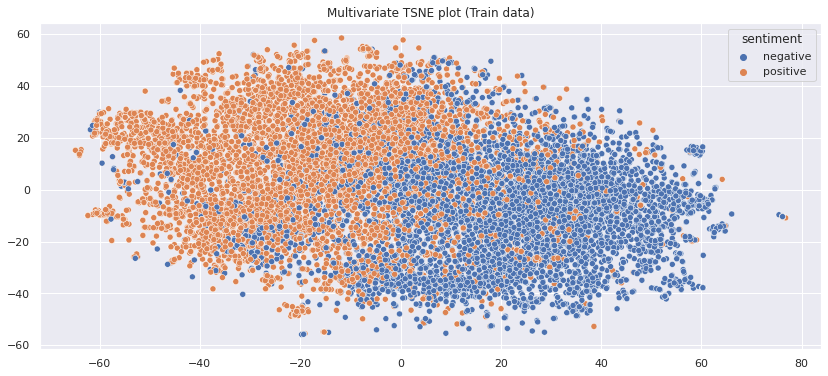


Time taken for execution :  224.2271499633789 seconds


In [50]:
# Required library
import time 
st = time.time()
from sklearn.manifold import TSNE  # EXECTUTION TIME : 10 MIN
import seaborn as sns

plt.figure(figsize = (14,6))   # define figure size

xtsne = TSNE(n_components=2,perplexity=30)   # With perplexity 30

# Display the results in a 2D plot
results = xtsne.fit_transform(train_X_normalized)   
vis_x = results[:, 0]
vis_y = results[:, 1]  
sns.scatterplot(x = vis_x,y = vis_y,hue=y_train)  
plt.title("Multivariate TSNE plot (Train data)")  
plt.show() 

et = time.time()
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program.

#### **APPLY MACHINE LEARNING MODELS**

##### **LOGISTIC REGRESSION**

The regularization parameters are :-  [0.001, 0.01, 0.1, 1, 10, 100]




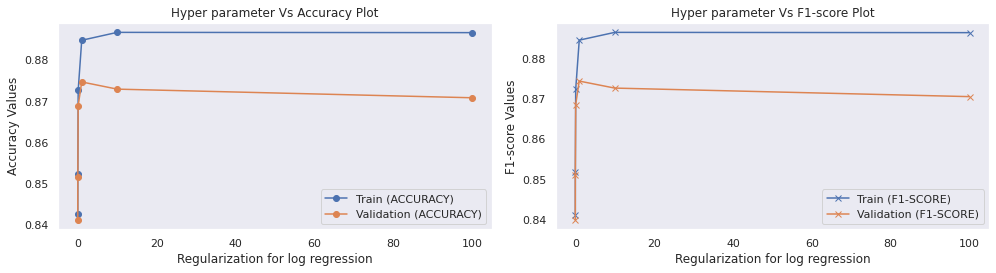


Time taken for execution :  50.28259301185608 seconds


In [51]:
# Required libraries
from sklearn.linear_model import LogisticRegression # execution time 5min (approx)
from sklearn.model_selection import GridSearchCV
import time 
st = time.time() 

# Define the regularization paramter
reg = [10 ** x for x in range(-3, 3)]  
param = {'C' : reg}

# Define the model
model = LogisticRegression(max_iter = 5000,penalty = 'l2',random_state = 6)

# Obtain the following scores
scores = ['accuracy','f1_macro'] 

# Hyperparameter tuning with gridsearchCV
clf = GridSearchCV(model,param,cv=5,scoring=scores,
                   return_train_score = True,refit = False)

# Fit the model
clf.fit(train_X_normalized,y_train.values.ravel()) 

cv_results = pd.DataFrame.from_dict(clf.cv_results_)

# obtain mean train,Cv scores and their corresponding hyperparameters:
train_acc = list(cv_results['mean_train_accuracy'])
cv_acc = list(cv_results['mean_test_accuracy'])
reg_acc = list(cv_results['param_C'])


# obtain mean train,Cv scores and their corresponding hyperparameters:
train_f1 = list(cv_results['mean_train_f1_macro'])
cv_f1 = list(cv_results['mean_test_f1_macro'])
reg_f1 = list(cv_results['param_C'])

print("The regularization parameters are :- ",reg)
print("\n")

# plot the Hyperparameters vs ACCURACY plot for train and Cv data:
plt.figure(figsize = (14,7))
plt.subplot(221)
plt.plot(reg_acc,train_acc,label = "Train (ACCURACY)",marker = "o")
plt.plot(reg_acc,cv_acc,label = "Validation (ACCURACY)",marker = "o")
plt.legend()
plt.xlabel("Regularization for log regression")
plt.ylabel("Accuracy Values")
plt.title("Hyper parameter Vs Accuracy Plot")
plt.grid()

# plot the Hyperparameters vs F1score plot for train and Cv data:
plt.subplot(222)
plt.plot(reg_f1,train_f1,label = "Train (F1-SCORE)",marker = "x")
plt.plot(reg_f1,cv_f1,label = "Validation (F1-SCORE)",marker = "x")
plt.legend()
plt.xlabel("Regularization for log regression")
plt.ylabel("F1-score Values")
plt.title("Hyper parameter Vs F1-score Plot")
plt.grid()

plt.tight_layout()   
plt.show()  

et = time.time()            
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program.

###### **CHECK THE PERFORMANCE OF THE MODEL ON THE TEST DATA**


Classification report for test data:-

              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      2334
    positive       0.88      0.89      0.88      2575

    accuracy                           0.88      4909
   macro avg       0.88      0.88      0.88      4909
weighted avg       0.88      0.88      0.88      4909



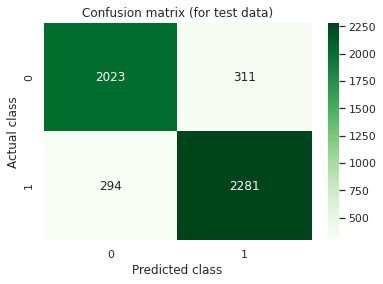


Time taken for execution :  2.510946035385132 seconds


In [87]:
# Required libraries   
import time 
st = time.time() 
from sklearn.metrics import classification_report,confusion_matrix

# Fit the best model & predict on test data

best_model = LogisticRegression(C = 1,max_iter = 5000,penalty = 'l2',random_state = 6)
best_model.fit(train_X_normalized,y_train)

y_pred = best_model.predict(test_X_normalized)

# Obtain the classification report for test data
print("\nClassification report for test data:-\n")
print(classification_report(y_test,y_pred))

# Display the confusion matrix for test data
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test,y_pred)

# Represent confusion matrix as a heatmap:
cm = np.array([ list(confusion_mat[0]),list(confusion_mat[1]) ])
sns.heatmap(cm,annot=True,fmt="d",cmap='Greens')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix (for test data)")
plt.show() 

et = time.time() 
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program.

##### **STORE THE MODEL PICKLE FILE**

In [88]:
import pickle

pickle_2 = open("log_model2.pkl", mode = "wb") 
pickle.dump(best_model,pickle_2) 
pickle_2.close()

###### **CREATE WORDCLOUD FOR FALSE POSITIVE POINTS**

Printing some random FP tweets :-

['finished church happy mother day' 'everybody welcome hello nicole'
 'oh superseeded not good enough'
 'got back school ugh want go dance tonight'
 'hungryyyyyyy going eat traditional indian foodthe pakistani way woowoo hahaha'
 'yeah like type snakesand wicked wicked wicked hotand idk think like'
 'let continue productive today' 'ooh haha thanks posted'
 'hulu desktop window medium center bitlydecbut not extenders unfortunately'
 'kno amazing known since got twitter tweeted word know haha']




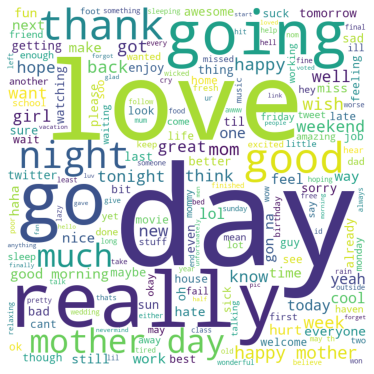


Time taken for execution :  1.9741697311401367 seconds


In [72]:
# Required library
import time 
st = time.time() 

false_positive_pts = [] # first we initialize a list to store FP points.

# extract "indices" of false positive points.
for idx,j in enumerate(y_test):
    if ((j == 'negative') and (y_pred[idx] == 'positive')):
        false_positive_pts.append(idx)
    else:
        continue 

# extract "tweets" of false positive points.
fp_tweets = []
for index in false_positive_pts :
    fp_tweets.append(X.iloc[index,0])

print("Printing some random FP tweets :-\n")
print(np.array(fp_tweets[50:60]))
print("\n")
#REFERENCE :https://www.geeksforgeeks.org/generating-word-cloud-python/

#GENERATE WORDCLOUD:
from wordcloud import WordCloud, STOPWORDS
comment_words = '' 
  
# iterate through the tweets
for sent in fp_tweets: 

    # split the sentence 
    tokens = sent.split() 
    comment_words += " ".join(tokens)+" "
  
word_cloud = WordCloud(width = 700, height = 700, 
                background_color ='white',  
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8,5),facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

et = time.time()
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program.

###### **CREATE WORDCLOUD FOR FALSE NEGATIVE POINTS**

Printing some random FN tweets :-

['net net net hmm bad weather weird summer'
 'miley tried voting wont let vote reason ill try back little later'
 'yu wan na kill' 'thought pretty good not die hard trekkie either'
 'got chili bean shirt hate messy eater lady'
 'good morning misfit pass tylenol'
 'peter let smoke watched dazed confused perfect pizza movie'
 'ooh jealous yoghurt carrot' 'make phone call hate anxiety someone cure'
 'still melting house shade not fair']




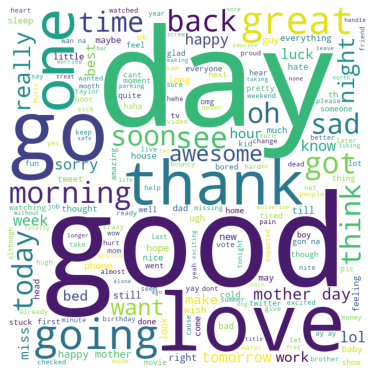


Time taken for execution :  2.076139450073242 seconds


In [74]:
# Required library
import time 
st = time.time() 

false_negative_pts = []  # First we initialize a list to store FN points.

# extract "indices" of false negative points.
for idx,j in enumerate(y_test):
    if ((j == 'positive') and (y_pred[idx] == 'negative')):
        false_negative_pts.append(idx)
    else:
        continue 

# extract "tweets" of false negative points.
fn_tweets = []
for index in false_negative_pts :
    fn_tweets.append(X.iloc[index,0])

print("Printing some random FN tweets :-\n")
print(np.array(fn_tweets[50:60]))
print("\n")

#REFERENCE :https://www.geeksforgeeks.org/generating-word-cloud-python/

# GENERATE WORDCLOUD:
from wordcloud import WordCloud, STOPWORDS

comment_words = '' 
  
# iterate through the tweets
for sent in fn_tweets: 

    # split the sentence
    tokens = sent.split() 
    comment_words += " ".join(tokens)+" "
  
word_cloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8,5),facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

et = time.time()
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program.

##### **DECISION TREE CLASSIFIER**

FOR ACCURACY METRIC :-

Difference between train_accuracy & cv_accuracy :

0     0.018181
1     0.016282
2     0.005478
3     0.000742
4     0.133359
5     0.061594
6     0.008905
7     0.003121
8     0.187052
9     0.076131
10    0.012790
11    0.004452
12    0.194691
13    0.078095
14    0.012747
15    0.004452
dtype: float64


The minimal difference is : 0.0007417789720314261


The minimal difference is observed at the depth : 5


The minimal difference is observed at the sample_split of : 1000




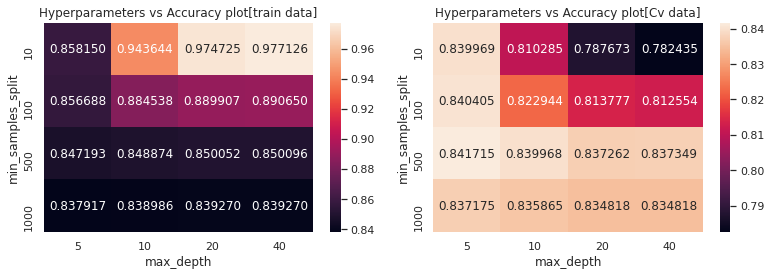


FOR F1-score METRIC :-

Difference between train_F1score & cv_F1score :

0     0.018238
1     0.016333
2     0.005493
3     0.000746
4     0.133717
5     0.061701
6     0.008917
7     0.003123
8     0.187515
9     0.076268
10    0.012806
11    0.004456
12    0.195103
13    0.078213
14    0.012762
15    0.004456
dtype: float64


The minimal difference is : 0.0007463724732309496


The minimal difference is observed at the depth : 5


The minimal difference is observed at the sample_split of : 1000




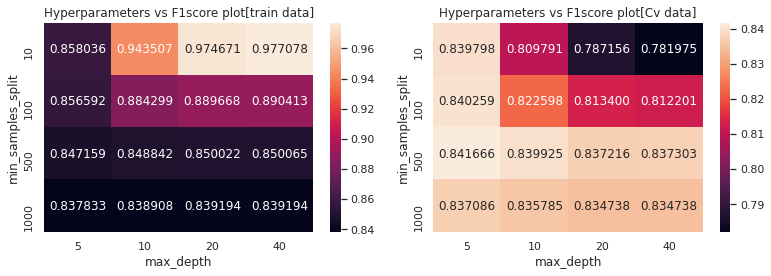


Time taken for execution :  274.46982169151306 seconds


In [75]:
# Required Libraries  #execution time: 4min
import time 
st = time.time()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# Define the model & the hyperparameters
model = DecisionTreeClassifier(random_state = 6)
param = {'max_depth':[5,10,20,40],'min_samples_split' :[10,100,500,1000]}

# Obtain the following scores
scores = ['accuracy','f1_macro'] 

# Perform hyperparameter tuning using GridsearchCv
clf = GridSearchCV(model,param,cv=5,scoring=scores,
                   return_train_score = True,refit = False)

# Fit the model
clf.fit(train_X_normalized,y_train)  


# make a dataframe out of cv_results:
cv_results = pd.DataFrame.from_dict(clf.cv_results_)


# obtain mean train,Cv scores and their corresponding hyperparameters:
train_acc = cv_results['mean_train_accuracy']
cv_acc = cv_results['mean_test_accuracy']
depth =  cv_results['param_max_depth']
min_sample_split = cv_results['param_min_samples_split']


# lets observe the point of minimal gap between CV and train curves: 
difference = train_acc - cv_acc
print("FOR ACCURACY METRIC :-\n")
print("Difference between train_accuracy & cv_accuracy :\n")
print(difference)
print("\n")

print("The minimal difference is :",min(difference))
print("\n")

print("The minimal difference is observed at the depth :",depth[difference.idxmin()])
print("\n")

print("The minimal difference is observed at the sample_split of :"
      ,min_sample_split[difference.idxmin()])
print("\n")

# plot the Hyperparameters vs accuracy score plot (heatmap) for train data:

plt.figure(figsize = (11,4))
plt.subplot(121)
df1 = pd.DataFrame({'accuracy_score':list(train_acc),
                   'max_depth':list(depth),
                   'min_samples_split':list(min_sample_split)})

result1 = df1.pivot("min_samples_split","max_depth","accuracy_score")
sns.heatmap(result1,annot=True,fmt="f")
plt.title('Hyperparameters vs Accuracy plot[train data]') 


plt.subplot(122)
df2 = pd.DataFrame({'accuracy_score':list(cv_acc),
                   'max_depth':list(depth),
                   'min_samples_split':list(min_sample_split)})

result2 = df2.pivot("min_samples_split","max_depth","accuracy_score")
sns.heatmap(result2,annot=True,fmt="f") 
plt.title('Hyperparameters vs Accuracy plot[Cv data]') 
plt.tight_layout()
plt.show()



# obtain mean train,Cv scores and their corresponding hyperparameters:

train_f1 = cv_results['mean_train_f1_macro']
cv_f1 = cv_results['mean_test_f1_macro']
depth =  cv_results['param_max_depth']
min_sample_split = cv_results['param_min_samples_split']


# lets observe the point of minimal gap between CV and train curves: 
difference = train_f1 - cv_f1
print("\nFOR F1-score METRIC :-\n")
print("Difference between train_F1score & cv_F1score :\n")
print(difference)
print("\n")

print("The minimal difference is :",min(difference))
print("\n")

print("The minimal difference is observed at the depth :",depth[difference.idxmin()])
print("\n")

print("The minimal difference is observed at the sample_split of :"
      ,min_sample_split[difference.idxmin()])
print("\n")

# plot the Hyperparameters vs F1score plot (heatmap) for train data:

plt.figure(figsize = (11,4))
plt.subplot(121)
df3 = pd.DataFrame({'F1_score':list(train_f1),
                   'max_depth':list(depth),
                   'min_samples_split':list(min_sample_split)})

result3 = df3.pivot("min_samples_split","max_depth","F1_score")
sns.heatmap(result3,annot=True,fmt="f") 
plt.title('Hyperparameters vs F1score plot[train data]')


plt.subplot(122)
df4 = pd.DataFrame({'F1_score':list(cv_f1),
                   'max_depth':list(depth),
                   'min_samples_split':list(min_sample_split)})

result4 = df4.pivot("min_samples_split","max_depth","F1_score")
sns.heatmap(result4,annot=True,fmt="f") 
plt.title('Hyperparameters vs F1score plot[Cv data]')
plt.tight_layout()
plt.show()


et = time.time()
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program. 

###### **CHECK PERFORMANCE OF MODEL ON TEST DATA**


Classification report for test data:-

              precision    recall  f1-score   support

    negative       0.81      0.87      0.84      2334
    positive       0.88      0.81      0.84      2575

    accuracy                           0.84      4909
   macro avg       0.84      0.84      0.84      4909
weighted avg       0.84      0.84      0.84      4909



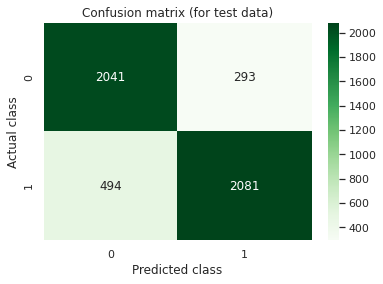


Time taken for execution :  2.73358154296875 seconds


In [76]:
# Required Libraries
import time
st = time.time() 
from sklearn.metrics import classification_report,confusion_matrix

# Fit the best model & predict for test data
best_model = DecisionTreeClassifier(random_state = 6,max_depth = 5,min_samples_split=500)
best_model.fit(train_X_normalized,y_train)

y_pred = best_model.predict(test_X_normalized)

# Obtain the Classification report for test data
print("\nClassification report for test data:-\n")
print(classification_report(y_test,y_pred))


# Compute Confusion matrix for test data
confusion_mat = confusion_matrix(y_test,y_pred)

# Represent confusion matrix as a heatmap:
cm = np.array([list(confusion_mat[0]),list(confusion_mat[1])])
sns.heatmap(cm,annot=True,fmt="d",cmap='Greens')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix (for test data)")
plt.show() 

et = time.time()
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program.

##### **NAIVE BAYES MODEL**

The alpha values are : [0.001 0.01 0.05 0.1 0.5 1 5 10 20]


The log of alpha values are :

[-6.907755278982137, -4.605170185988091, -2.995732273553991, -2.3025850929940455, -0.6931471805599453, 0.0, 1.6094379124341003, 2.302585092994046, 2.995732273553991]




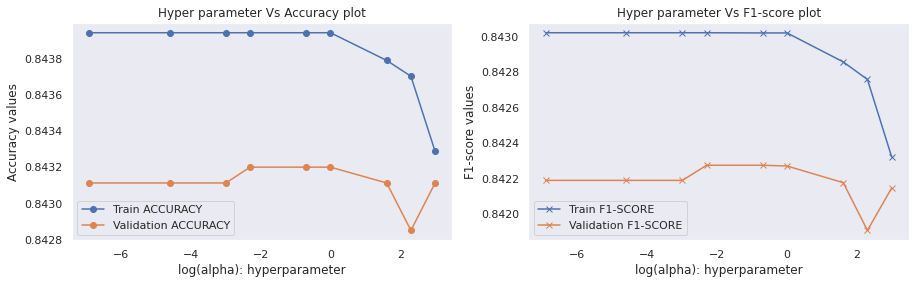


Time taken for execution :  10.821053743362427 seconds


In [77]:
# import necessary libraries execution time : 25s
import time
st = time.time()
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import math


# Build the model & cross validate using gridsearchCV
model = MultinomialNB()
param = { 'alpha':[0.001,0.05,0.01,0.1,0.5,1,5,10,20],
        'fit_prior' : [True] }
scores = ['accuracy','f1_macro'] 

clf = GridSearchCV(model,param,cv=5,scoring=scores,
                   return_train_score = True,refit = False)

# Fit the model
clf.fit(train_X_normalized,y_train) 

# make a dataframe out of validation_results:
cv_results = pd.DataFrame.from_dict(clf.cv_results_)
cv_results = cv_results.sort_values(['param_alpha'])

# store mean train, Cv scores and their corresponding alpha:
train_acc = cv_results['mean_train_accuracy']
cv_acc = cv_results['mean_test_accuracy']
alpha =  cv_results['param_alpha']

# store mean train, Cv scores and their corresponding alpha:
train_f1 = cv_results['mean_train_f1_macro']
cv_f1 = cv_results['mean_test_f1_macro']
alpha =  cv_results['param_alpha']

# Use log alpha to ensure numerical stability:
log_alpha = [math.log(val) for val in alpha]
print("The alpha values are :",alpha.values)
print("\n")
print("The log of alpha values are :\n")
print(log_alpha)
print("\n")

# plot the Hyperparameters vs Accuracy plot for train and Cv data:
plt.figure(figsize = [15,4])
plt.subplot(121)
plt.plot(log_alpha,train_acc,label = "Train ACCURACY",marker = "o")
plt.plot(log_alpha,cv_acc,label = "Validation ACCURACY",marker = "o")
plt.legend()
plt.xlabel("log(alpha): hyperparameter")
plt.ylabel("Accuracy values")
plt.title("Hyper parameter Vs Accuracy plot")
plt.grid()

# plot the Hyperparameters vs F1score plot for train and Cv data:
plt.subplot(122)
plt.plot(log_alpha,train_f1,label = "Train F1-SCORE",marker = "x")
plt.plot(log_alpha,cv_f1,label = "Validation F1-SCORE",marker = "x")
plt.legend()
plt.xlabel("log(alpha): hyperparameter")
plt.ylabel("F1-score values")
plt.title("Hyper parameter Vs F1-score plot")
plt.grid()
plt.show()

et = time.time()
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program.

###### **CHECK FOR PERFORMANCE OF THE MODEL ON TEST DATA**


Classification report for test data:-

              precision    recall  f1-score   support

    negative       0.86      0.81      0.83      2334
    positive       0.84      0.88      0.86      2575

    accuracy                           0.84      4909
   macro avg       0.85      0.84      0.84      4909
weighted avg       0.85      0.84      0.84      4909



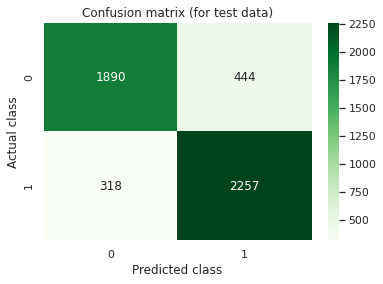


Time taken for execution :  0.5086517333984375 seconds


In [78]:
# Required Libraries
import time
st = time.time()
from sklearn.metrics import classification_report,confusion_matrix

# Fit the best model & predict for test data
best_model = MultinomialNB(alpha = 1,fit_prior = True)
best_model.fit(train_X_normalized,y_train)

y_pred = best_model.predict(test_X_normalized)

# Obtain the Classification report for test data
print("\nClassification report for test data:-\n")
print(classification_report(y_test,y_pred))

# Compute the confusion matrix for test data
confusion_mat = confusion_matrix(y_test,y_pred)

# Represent confusion matrix as a heatmap:
cm = np.array([list(confusion_mat[0]),list(confusion_mat[1])])
sns.heatmap(cm,annot=True,fmt="d",cmap='Greens')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix (for test data)")
plt.show() 

et = time.time()
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program.

##### **RANDOM FOREST (ENSEMBLE MODEL)**

In [79]:
# Reference : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Required libraries
import time
st = time.time()
from sklearn.ensemble import RandomForestClassifier  # execution time 12min
from sklearn.model_selection import RandomizedSearchCV 

# Define the model
model = RandomForestClassifier(random_state = 6,n_jobs=-1) 

# Number of trees in random forest                
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Number of features to consider at every split         
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree 
max_depth = [int(x) for x in np.linspace(10,50, num = 3)] 
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 30, 50, 100, 150, 300]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5, 10, 30, 50, 100, 150, 300]

# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid

# Max samples 
max_samples = [0.2,0.4,0.6,0.8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'max_samples': max_samples,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap} 

# Perform hyperparam tuning using randomizedsearchCV
clf = RandomizedSearchCV(model,random_grid,cv=3,scoring = 'f1_macro',
                         return_train_score = True,random_state = 6) 

# Fit the model
clf.fit(train_X_normalized,y_train)  

# Obtain the best parameters & scores
print("The best parameters found are : \n")  
print(clf.best_params_)                          
print("\nThe best score found -->",clf.best_score_)  
       
et = time.time()                 
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program.

The best parameters found are : 

{'n_estimators': 250, 'min_samples_split': 30, 'min_samples_leaf': 10, 'max_samples': 0.8, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}

The best score found --> 0.8614232846619295

Time taken for execution :  670.4942944049835 seconds


###### **CHECK THE PERFORMANCE OF MODEL ON TEST DATA**

F1 score metric for train data :  0.942675253116352
Accuracy metric for train data :  0.9428147372097084

Classification report for test data:-

              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      2334
    positive       0.88      0.86      0.87      2575

    accuracy                           0.87      4909
   macro avg       0.87      0.87      0.87      4909
weighted avg       0.87      0.87      0.87      4909



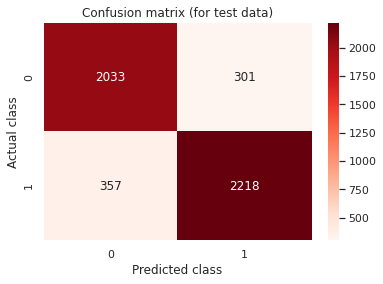


Time taken for execution :  40.081172943115234 seconds


In [80]:
# Required libraries
import time
st = time.time()
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

# Fit the best model & predict for train & test data
best_model = RandomForestClassifier(random_state = 6,n_jobs=-1,n_estimators = 250,min_samples_split = 30, 
                                    min_samples_leaf = 10, max_samples = 0.8, max_features = 'auto',
                                    max_depth = 10, bootstrap = False)

best_model.fit(train_X_normalized,y_train) 

y_pred_train = best_model.predict(train_X_normalized)
y_pred = best_model.predict(test_X_normalized)

# Model performance on train & test data

f1score_train = f1_score(y_train,y_pred_train,average = 'macro')
print("F1 score metric for train data : ",f1score_train)

accuracy_train = accuracy_score(y_train,y_pred_train)
print("Accuracy metric for train data : ",accuracy_train)

# Obtain the Classification report for test data
print("\nClassification report for test data:-\n")
print(classification_report(y_test,y_pred))

# Compute the confusion matrix for test data
confusion_mat = confusion_matrix(y_test,y_pred)

# Represent confusion matrix as a heatmap:
cm = np.array([list(confusion_mat[0]),list(confusion_mat[1])])
sns.heatmap(cm,annot=True,fmt="d",cmap='Reds')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix (for test data)")
plt.show()    

et = time.time()
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program.

##### **XGBOOST CLASSIFIER**

The best paramters from randomsearchCv : {'n_estimators': 70, 'learning_rate': 0.3}


HEATMAP FOR TRAIN_F1score VS HYPERPARAMETERS :-



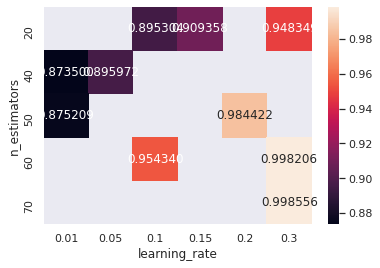



HEATMAP FOR CV_F1score VS HYPERPARAMETERS :-



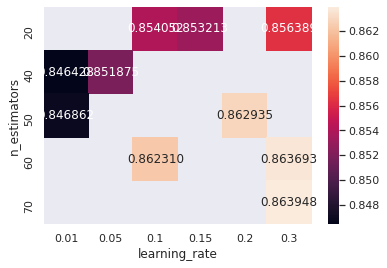


Time taken for execution :  381.297461271286 seconds


In [82]:
# Required libraries
import time
st = time.time()
from xgboost import XGBClassifier   # execution time (approx) 13 min
from sklearn.model_selection import RandomizedSearchCV
 
 
# Define the model & the hyperparams 
model = XGBClassifier(max_depth = 5,seed = 8)
param = {'learning_rate':[0.05,0.01,0.10,0.15,0.2,0.3,0.5], 
         'n_estimators' : [20,30,40,50,60,70]} 
 
# Perform hyperparameter tuning using RandomizedSearchCV
clf = RandomizedSearchCV(model,param,cv=3,scoring='f1_macro',return_train_score = True) 
 
# Fit the model 
clf.fit(train_X_normalized,y_train) 
 
print("The best paramters from randomsearchCv :",clf.best_params_)
print('\n') 
 
# make a dataframe out of cv_results:
cv_results = pd.DataFrame.from_dict(clf.cv_results_)            
 
# obtain mean train,Cv scores and their corresponding hyperparameters:
train_f1 = cv_results['mean_train_score']
cv_f1 = cv_results['mean_test_score']
lr =  cv_results['param_learning_rate']  
no_of_estimators = cv_results['param_n_estimators']  
 
# plot the Hyperparameters vs TRAIN_f1score plot (heatmap) for train data: 

df1 = pd.DataFrame({'f1_score':list(train_f1), 
                   'learning_rate':list(lr), 
                   'n_estimators':list(no_of_estimators)}) 
 
result1 = df1.pivot("n_estimators","learning_rate","f1_score")

print("HEATMAP FOR TRAIN_F1score VS HYPERPARAMETERS :-\n")
sns.heatmap(result1,annot=True,fmt="f")
plt.show()
print('\n') 
                                           
# plot the Hyperparameters vs CV_f1score plot (heatmap) for CV data: 
 
df2 = pd.DataFrame({'f1_score':list(cv_f1), 
                   'learning_rate':list(lr), 
                   'n_estimators':list(no_of_estimators)}) 
 
result2 = df2.pivot("n_estimators","learning_rate","f1_score")
print("HEATMAP FOR CV_F1score VS HYPERPARAMETERS :-\n")
sns.heatmap(result2,annot=True,fmt="f") 
plt.show()                                                                                 

et = time.time() 
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program.       

###### **CHECK THE PERFORMANCE OF THE MODEL ON TEST DATA**

F1 score metric for train data :  0.864188087592342
Accuracy metric for train data :  0.8642395669635062

Classification report for test data:-

              precision    recall  f1-score   support

    negative       0.82      0.87      0.84      2334
    positive       0.88      0.82      0.85      2575

    accuracy                           0.85      4909
   macro avg       0.85      0.85      0.85      4909
weighted avg       0.85      0.85      0.85      4909



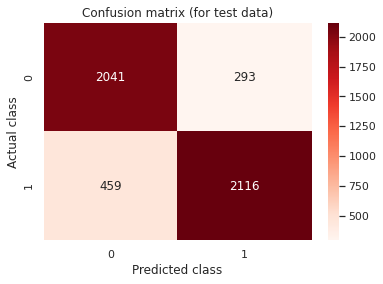


Time taken for execution :  20.80749821662903 seconds


In [84]:
# Required libraries
import time
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
st = time.time()

# Fit the best model & predict for train & test data
best_model = XGBClassifier(max_depth = 5,seed = 8,n_estimators = 50, learning_rate = 0.01)
best_model.fit(train_X_normalized,y_train)

y_pred_train = best_model.predict(train_X_normalized)
y_pred = best_model.predict(test_X_normalized)

# Model performance on train & test data

f1score_train = f1_score(y_train,y_pred_train,average = 'macro')
print("F1 score metric for train data : ",f1score_train)

accuracy_train = accuracy_score(y_train,y_pred_train)
print("Accuracy metric for train data : ",accuracy_train)

# Obtain the Classification report for test data
print("\nClassification report for test data:-\n")
print(classification_report(y_test,y_pred))


# Compute the confusion matrix for test data
confusion_mat = confusion_matrix(y_test,y_pred)

# Represent confusion matrix as a heatmap:
cm = np.array([list(confusion_mat[0]),list(confusion_mat[1])]) 
sns.heatmap(cm,annot=True,fmt="d",cmap='Reds')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix (for test data)")
plt.show() 

et = time.time()
print("\nTime taken for execution : ",et-st,'seconds') # time taken by the program. 

##### **FINAL COMPARISON OF VARIOUS MODELS**

In [85]:
# FINAL RESULTS
from prettytable import PrettyTable

# final results of the task: 
# create a table with desired attributes: 
summary = [["Logistic regression","88%"],["Decision Tree","84%"],
           ['Multinomial Naive bayes','84%'],['Random forest','87%'],
           ['Xgboost','85%']] 

table = PrettyTable(['Model','F1 score (Macro)']) 
 
# Add rows to the table: 
for j in summary: 
    table.add_row(j) 
     
print(table)             

+-------------------------+------------------+
|          Model          | F1 score (Macro) |
+-------------------------+------------------+
|   Logistic regression   |       88%        |
|      Decision Tree      |       84%        |
| Multinomial Naive bayes |       84%        |
|      Random forest      |       87%        |
|         Xgboost         |       85%        |
+-------------------------+------------------+


In [ ]:
# DEEP LEARNING MODELS
import tensorflow as tf
from tensorflow import keras

In [ ]:
new_data.head()

,textID,sentiment,preprocessed_text
0,cb774db0d1,neutral,responded going
1,549e992a42,negative,sooo sad miss san diego
2,088c60f138,negative,bos bullying
3,9642c003ef,negative,interview leave alone
4,358bd9e861,negative,son put release already bought


In [ ]:
# just remove 'neutral rows'
new_data.drop(new_data[new_data['sentiment'] == 'neutral'].index, inplace = True) 

In [ ]:
# Train test split is done
from sklearn.model_selection import train_test_split
y = new_data['sentiment']
X = new_data['preprocessed_text'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=70,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape) 

(11454,)
(4909,)
(11454,)
(4909,)


In [ ]:
import pandas as pd
ytrain_labels = pd.get_dummies(y_train)
ytest_labels = pd.get_dummies(y_test) 

Length of word indices :- 14260


The median length of words in the sequences :- 7.0


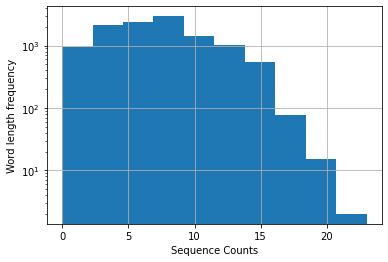


Padded training shape: (11454, 10)
Training sequences data type: <class 'list'>
Padded Training sequences data type: <class 'numpy.ndarray'>

Padded testing shape: (4909, 10)
Testing sequences data type: <class 'list'>
Padded Testing sequences data type: <class 'numpy.ndarray'>


In [ ]:
# reference : https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
# lets pad & tokenize the data:-
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

# Tokenize our training data
oov_token = '<UNK>' ;
tokenizer = Tokenizer(oov_token=oov_token,filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(X_train) 

# Get our training data word index
word_index = tokenizer.word_index  
print("Length of word indices :-",len(word_index))
print('\n')

# Encode training data sentences into sequences
train_sequences = tokenizer.texts_to_sequences(X_train)

# Get max training sequence length
import statistics ; import matplotlib.pyplot as plt
lengths = [len(x) for x in train_sequences]
print("The median length of words in the sequences :-",statistics.median(lengths))
plt.hist(lengths,bins = 10)
plt.xlabel('Sequence Counts')
plt.ylabel('Word length frequency')
plt.grid()
plt.yscale('log')
plt.show() 


# pad the sequence
train_padded = pad_sequences(train_sequences,padding = 'post',maxlen = 10 ,truncating='post') 
 
# tokenize & Pad the testing sequences 
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences,padding='post',maxlen = 10,truncating='post') 
 
# Output the results of our work 
print("\nPadded training shape:", train_padded.shape)
print("Training sequences data type:", type(train_sequences))
print("Padded Training sequences data type:", type(train_padded)) 
 
print("\nPadded testing shape:", test_padded.shape)
print("Testing sequences data type:", type(test_sequences))
print("Padded Testing sequences data type:", type(test_padded))

In [ ]:
!pip install tensorflow_addons 

     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [ ]:
# required tensorflow & keras libraries to  build deep learning models
from keras.layers import Dense,Input,Dropout,LSTM,Bidirectional
from keras.models import Model
import random as rn  
import tensorflow_addons as tfa

# callbacks for various purposes
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

In [ ]:
# Decay learning rate scheduler
import tensorflow
def scheduler(epoch,lr): 
    if ((epoch) % 3 == 0): 
        lr = ((lr)-(lr*(0.05))) # 0.05 
    else: 
        pass 
    return lr 


In [ ]:
tf.keras.backend.clear_session() # For easy reset of notebook state.
#initializer = keras.initializers.RandomNormal(stddev=0.03,seed = 6) # weights Initializer 

#Input layer 
input_layer = Input(shape=(10,))

# embedding layer 
from tensorflow.keras.layers import Embedding
embedding_layer = Embedding(input_dim = 14261,output_dim = 64,
                            trainable = True,input_length=10)(input_layer)

#Dense hidden layer 1
layer1 = Bidirectional(LSTM(units = 64,dropout = 0.5,return_sequences =  True))(embedding_layer)

#Dense hidden layer 2
layer2 = Bidirectional(LSTM(units = 64,dropout = 0.5))(layer1)

#output layer
output = Dense(2,activation='softmax')(layer2) 
 
#Creating a model 
model = Model(inputs = input_layer,outputs=output) 

# Optimizer 
optimizer = keras.optimizers.Adam() 
 
#save model at every epoch end if validation accuracy is improved
#filepath="model_save_1/weights-{epoch:02d}-{val_acc:.4f}.hdf5"
#checkpoint = ModelCheckpoint(filepath=filepath,monitor='val_acc',verbose=1,save_best_only=True,mode='auto') 
 
#Learning rate scheduler
lrschedule = LearningRateScheduler(scheduler,verbose=1) 
 
#early stopping 
earlystop = EarlyStopping(monitor='val_acc',patience=2, verbose=1) 
  

# metric 
f1score = tfa.metrics.F1Score(num_classes = 2,average = 'macro')

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['acc',f1score])  

model.summary() 


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 10, 64)            912704    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 128)           66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
Total params: 1,077,826
Trainable params: 1,077,826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
model.fit(train_padded,ytrain_labels,epochs=20,validation_split=0.3, 
          batch_size=128,callbacks=[lrschedule,earlystop]) 

Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.0009500000451225787.
63/63 [==============================] - 13s 106ms/step - loss: 0.6890 - acc: 0.5472 - f1_score: 0.5045 - val_loss: 0.6692 - val_acc: 0.5595 - val_f1_score: 0.4294
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0009500000160187483.
63/63 [==============================] - 5s 84ms/step - loss: 0.5407 - acc: 0.7170 - f1_score: 0.7158 - val_loss: 0.4150 - val_acc: 0.8161 - val_f1_score: 0.8153
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0009500000160187483.
63/63 [==============================] - 5s 84ms/step - loss: 0.4009 - acc: 0.8188 - f1_score: 0.8186 - val_loss: 0.3492 - val_acc: 0.8484 - val_f1_score: 0.8483
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0009025000152178108.
63/63 [==============================] - 5s 82ms/step - loss: 0.3313 - acc: 0.8595 - f1_score: 0.8593 - val_loss: 0.3433 - val_acc: 